# Problema de sesgo en la variable de costo de apartamentos

In [15]:
import pandas as pd

#Cargar los datos
file_path = 'datos_apartamentos_rent.csv'

df = pd.read_csv(file_path, encoding="utf-8",sep=';')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   5837 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

## Variable nominal de Precio

Actualmente se observa un sesgo grande hacia la izquierda por la presencia de datos átipicos muy altos

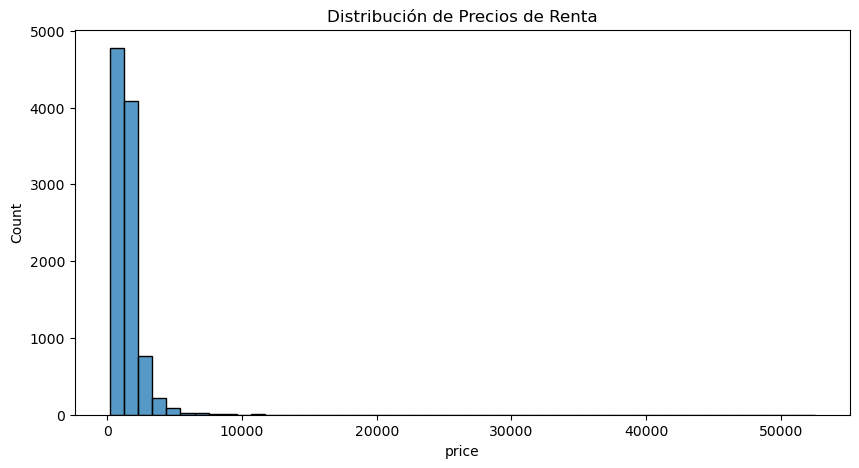

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

#Se grafica la distribución de los precios de venta 
plt.figure(figsize=(10,5))
sns.histplot(df["price"], bins=50)
plt.title("Distribución de Precios de Renta")
plt.show()

Aún haciendo ajustes por logaritmos se observa el sesgo

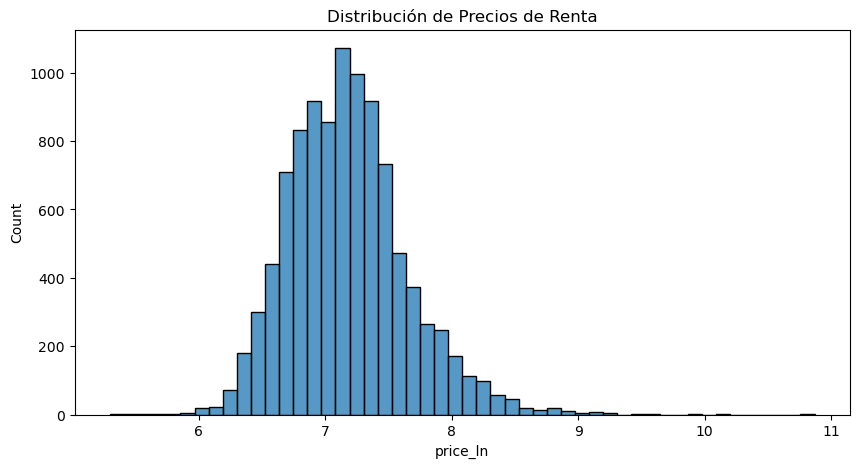

In [17]:
import numpy as np
 
df["price_ln"] = np.log(df["price"])

#Se grafica la distribución de los precios de venta 
plt.figure(figsize=(10,5))
sns.histplot(df["price_ln"], bins=50)
plt.title("Distribución de Precios de Renta")
plt.show()

Viendo puntualmente los datos se observa que son apartamentos sectorizados en una zona específica: Los Angeles

In [25]:
outliers_price = df[df['price'] > 10000].sort_values('price')
outliers_price

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,address,cityname,state,latitude,longitude,source,time,price_ln,price_by_sf,priceln_by_sf
9227,5508879959,housing/rent/apartment,"Spacious Two BR, Two BA",Ten Thousand offers the perfect 2 beds and 2 b...,"Dishwasher,Refrigerator,Washer Dryer",2.0,2.0,USD,No,Thumbnail,...,NaN,Los Angeles,CA,34.0584,-118.4135,RentDigs.com,1568759208,9.268609,6.479218,0.005665
8573,5668636698,housing/rent/apartment,Two BR 1760 Avenida del Mundo Unit 508,This unit is located at 1760 Avenida del Mundo...,NaN,2.0,2.0,USD,No,Thumbnail,...,1760 Avenida Del Mundo Unit 508,Coronado,CA,32.6596,-117.1595,RentLingo,1577360129,9.305651,8.320726,0.007039
9946,5650235118,housing/rent/apartment,5 BR 1 BA In Broward FL 33019,A pristine oceanfront residence at TRUMP HOLLY...,"Elevator,Gym,Parking,Patio/Deck,Pool,Storage,T...",1.0,5.0,USD,No,Thumbnail,...,NaN,Hollywood,FL,26.0121,-80.2453,ListedBuy,1576100567,9.305651,3.240059,0.002741
9997,5668643292,housing/rent/apartment,Six BR 9908 Bentcross Drive,"This unit is located at 9908 Bentcross Drive, ...",NaN,8.5,6.0,USD,No,Thumbnail,...,9908 Bentcross Dr,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560,9.305651,0.971903,0.000822
9825,5508686302,housing/rent/apartment,Move in to this fully furnished Ritz!,Located in the exclusive South Park District o...,"Gym,Pool,Storage,Wood Floors",3.0,3.0,USD,No,Thumbnail,...,NaN,Los Angeles,CA,34.0394,-118.2656,RentDigs.com,1568745642,9.472705,5.138340,0.003744
8581,5508735725,housing/rent/apartment,Two BR Apartment - Located along the Wilshire ...,Wilshire Margot represents luxurious. best. Ou...,NaN,2.0,2.0,USD,No,Thumbnail,...,NaN,Los Angeles,CA,34.0630,-118.4363,RentDigs.com,1568748646,9.510445,10.188679,0.007178
9972,5664581587,housing/rent/apartment,Six BR 3033 N Beverly Glen Cir,This unit is located at 3033 N Beverly Glen Ci...,NaN,4.0,6.0,USD,No,Thumbnail,...,3033 N Beverly Glen Circle,Los Angeles,CA,34.0372,-118.2972,RentLingo,1577015930,9.612467,3.696835,0.002377
9990,5659901599,housing/rent/apartment,Four BR 864 Teakwood Rd,"This unit is located at 864 Teakwood Rd, Los A...","Dishwasher,Parking,Pool,Refrigerator",5.0,4.0,USD,No,Thumbnail,...,864 Teakwood Road,Los Angeles,CA,34.0372,-118.2972,RentLingo,1576666648,9.878170,3.900000,0.001976
9996,5668640983,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",NaN,8.0,6.0,USD,No,Thumbnail,...,256 Las Entradas,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419,10.126631,2.868288,0.001162
8829,5666447277,housing/rent/apartment,Studio apartment for rent,Barstow It's 14/18ft. studio apartment furnish...,"AC,Cable or Satellite,Internet Access,Patio/De...",1.0,0.0,USD,No,Thumbnail,...,1101 Pueblo Drive,Barstow,CA,34.8870,-117.0350,RentDigs.com,1577185712,10.868568,37.023977,0.007665


## Viendo la variable de precio desde otra perspectiva: Precio por pie cuadrado

Nuevamente se observa un sesgo en los datos

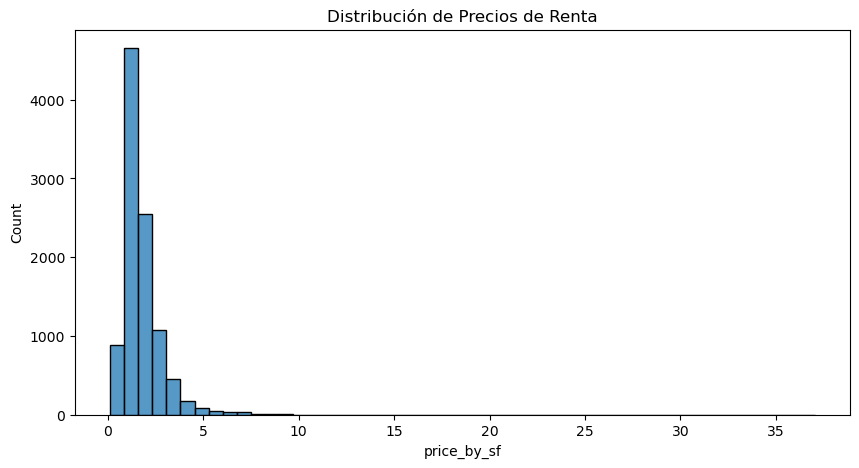

In [21]:
df['price_by_sf'] = df['price'] / df['square_feet']

#Se grafica la distribución de los precios de venta 
plt.figure(figsize=(10,5))
sns.histplot(df["price_by_sf"], bins=50)
plt.title("Distribución de Precios de Renta")
plt.show()

Al hacer el ajuste por logaritmo tiene el mismo efecto

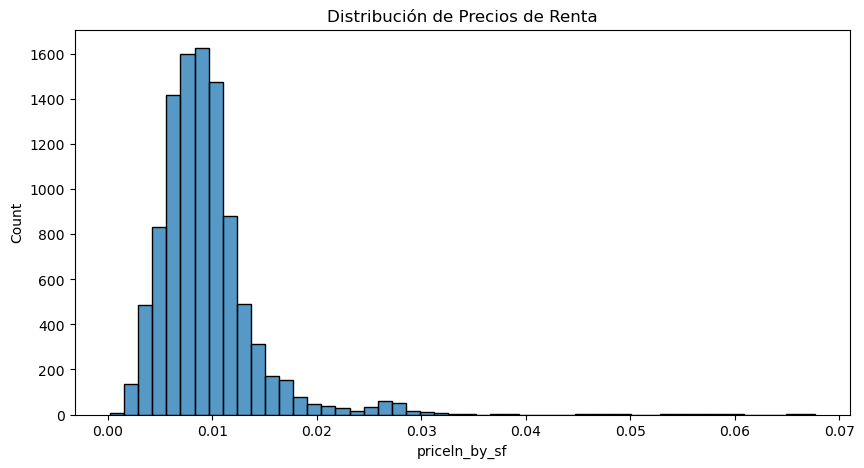

In [22]:
df['priceln_by_sf'] = df['price_ln'] / df['square_feet']

#Se grafica la distribución de los precios de venta 
plt.figure(figsize=(10,5))
sns.histplot(df["priceln_by_sf"], bins=50)
plt.title("Distribución de Precios de Renta")
plt.show()

Sin embargo, aparecen menos outliers

In [27]:
outliers_price_by_sf = df[df['price_by_sf'] > 10].sort_values('price_by_sf')
outliers_price_by_sf

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,...,address,cityname,state,latitude,longitude,source,time,price_ln,price_by_sf,priceln_by_sf
8581,5508735725,housing/rent/apartment,Two BR Apartment - Located along the Wilshire ...,Wilshire Margot represents luxurious. best. Ou...,NaN,2.0,2.0,USD,No,Thumbnail,...,NaN,Los Angeles,CA,34.0630,-118.4363,RentDigs.com,1568748646,9.510445,10.188679,0.007178
8,5668610290,housing/rent/apartment,Studio apartment 333 Hyde St,"This unit is located at 333 Hyde St, San Franc...",Refrigerator,1.0,0.0,USD,No,Thumbnail,...,333 Hyde St,San Francisco,CA,37.7599,-122.4379,RentLingo,1577358313,7.309881,10.833333,0.052970
12,5664598162,housing/rent/apartment,Studio apartment 2326 N 6th Avenue,"This unit is located at 2326 N sixth Avenue, T...",NaN,NaN,1.0,USD,No,Thumbnail,...,2326 N 6th Ave,Tucson,AZ,32.2264,-110.9438,RentLingo,1577017148,7.492760,11.506410,0.048031
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,...,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410,7.237059,12.990654,0.067636
6,5668627426,housing/rent/apartment,Studio apartment 2432 Penmar Ave,"This unit is located at 2432 Penmar Ave, Venic...",NaN,NaN,0.0,USD,No,Thumbnail,...,2432 Penmar Avenue,Venice,CA,33.9932,-118.4609,RentLingo,1577359461,7.495542,13.636364,0.056784
5,5667891676,housing/rent/apartment,0 BR in New York NY 10019,**RARE GEM WITH PRIVATE OUTDOOR TERRACE****AVA...,"Dishwasher,Elevator,Patio/Deck,Pool,Storage",1.0,0.0,USD,No,Thumbnail,...,350 West 50th St,Manhattan,NY,40.7629,-73.9885,Listanza,1577289784,7.813996,19.038462,0.060108
8829,5666447277,housing/rent/apartment,Studio apartment for rent,Barstow It's 14/18ft. studio apartment furnish...,"AC,Cable or Satellite,Internet Access,Patio/De...",1.0,0.0,USD,No,Thumbnail,...,1101 Pueblo Drive,Barstow,CA,34.8870,-117.0350,RentDigs.com,1577185712,10.868568,37.023977,0.007665


Solo dos registros están en ambos escenarios

In [35]:
pd.merge(outliers_price, outliers_price_by_sf, how='inner', on='id')

,id,category_x,title_x,body_x,amenities_x,bathrooms_x,bedrooms_x,currency_x,fee_x,has_photo_x,...,address_y,cityname_y,state_y,latitude_y,longitude_y,source_y,time_y,price_ln_y,price_by_sf_y,priceln_by_sf_y
0,5508735725,housing/rent/apartment,Two BR Apartment - Located along the Wilshire ...,Wilshire Margot represents luxurious. best. Ou...,NaN,2.0,2.0,USD,No,Thumbnail,...,NaN,Los Angeles,CA,34.063,-118.4363,RentDigs.com,1568748646,9.510445,10.188679,0.007178
1,5666447277,housing/rent/apartment,Studio apartment for rent,Barstow It's 14/18ft. studio apartment furnish...,"AC,Cable or Satellite,Internet Access,Patio/De...",1.0,0.0,USD,No,Thumbnail,...,1101 Pueblo Drive,Barstow,CA,34.887,-117.0350,RentDigs.com,1577185712,10.868568,37.023977,0.007665


## Conclusión

Es necesario remover valores átipicos para normalizar un poco la distribución de costos. Se puede emplear algo básico como un corte a ojo o por la desviación estándar

In [54]:
subdf = df[df["price"] < 8000]
len(subdf)

9977

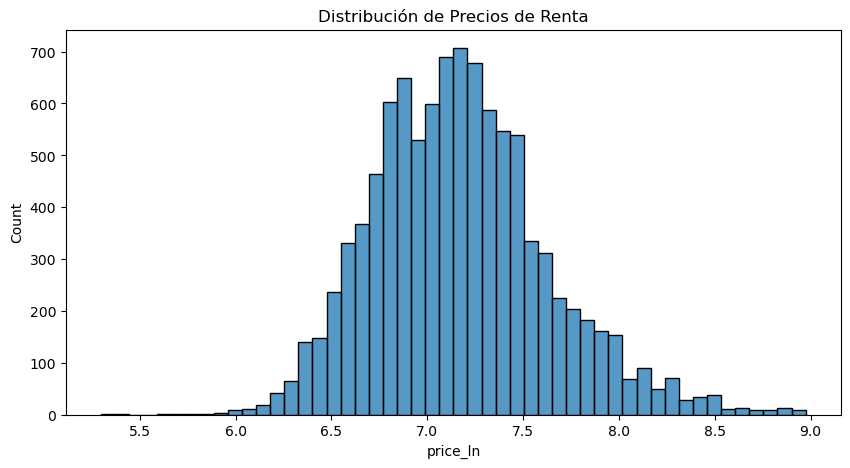

In [53]:
#Se grafica la distribución de los precios de venta 
plt.figure(figsize=(10,5))
sns.histplot(subdf["price_ln"], bins=50)
plt.title("Distribución de Precios de Renta")
plt.show()

In [56]:
std_price = np.std(df['price'])
mean_price = np.mean(df['price'])

print("Mean of {mean_price} and std of {std_price}. So the intervals are between {lower_limit} and {upper_limit}".format(
    mean_price=mean_price, std_price=std_price, lower_limit=mean_price-3*std_price, upper_limit=mean_price+3*std_price)
    )

subdf = df[df["price"] < mean_price+3*std_price]
len(subdf)

Mean of 1486.2775 and std of 1076.4541408224347. So the intervals are between -1743.084922467304 and 4715.639922467304


9877

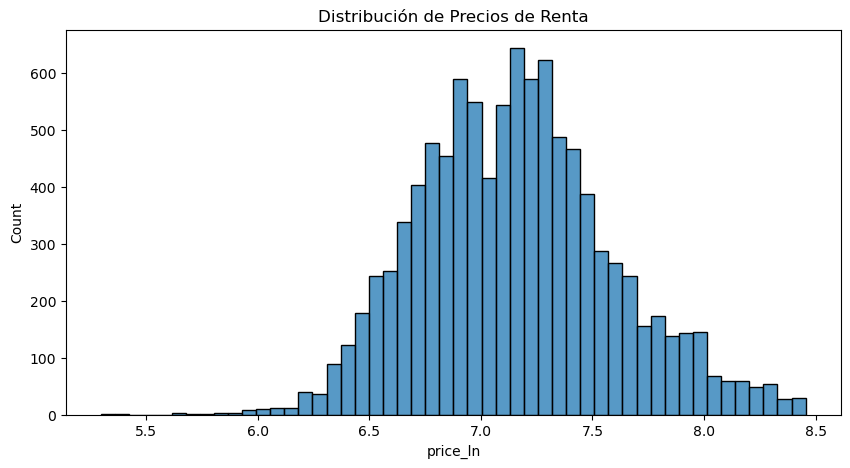

In [58]:
#Se grafica la distribución de los precios de venta 
plt.figure(figsize=(10,5))
sns.histplot(subdf["price_ln"], bins=50)
plt.title("Distribución de Precios de Renta")
plt.show()